# Curvas de Aprendizado

In [18]:
from aurelio.plotter import collect
import os
import pandas as pd
import seaborn as sns

In [19]:
exps = [
    "no_elmo",
    "elmo",
    "kfold_reduced_elmo",
    "single_fold_no_elmo",
    "single_fold_no_elmo_reduced",
    "single_fold_elmo",
    "single_fold_elmo_reduced",
]

dfs = {}
for exp in exps:
    path = "{}/metrics/{}".format(os.getcwd(), exp)
    dfs[exp] = pd.DataFrame.from_records(collect(path, exp))
dfs["elmo"].head()

,best_epoch,best_validation_em,best_validation_end_acc,best_validation_f1,best_validation_loss,best_validation_span_acc,best_validation_start_acc,epoch,fold,name,...,training_loss,training_span_acc,training_start_acc,training_start_epoch,validation_em,validation_end_acc,validation_f1,validation_loss,validation_span_acc,validation_start_acc
0,2,0.057471,0.091954,0.241233,8.705070,0.022989,0.091954,11,9,elmo,...,2.009379,0.527638,0.673367,0,0.045977,0.103448,0.214626,11.205788,0.034483,0.080460
1,19,0.109890,0.131868,0.259392,16.135937,0.043956,0.098901,19,1,elmo,...,0.110408,0.973422,0.986711,0,0.109890,0.131868,0.259392,16.135937,0.043956,0.098901
2,4,0.077778,0.055556,0.203694,9.837403,0.044444,0.088889,13,6,elmo,...,2.654311,0.406977,0.523256,0,0.055556,0.055556,0.208340,11.016690,0.022222,0.077778
3,12,0.111111,0.177778,0.254547,12.280903,0.088889,0.144444,19,5,elmo,...,0.102897,0.977049,0.985246,0,0.066667,0.133333,0.239269,13.218128,0.044444,0.100000
4,9,0.055556,0.100000,0.201327,9.906672,0.033333,0.044444,18,10,elmo,...,0.770211,0.861386,0.861386,0,0.044444,0.111111,0.213287,10.329873,0.022222,0.044444


In [20]:
def plot_perc(dfs, names, metric):
    dfs = pd.concat([dfs[name] for name in names])
    sns.set(rc={'figure.figsize':(15,10)})
    sns.lineplot(x="perc", y=metric, data=dfs, hue="name")

## ELMO vs no ELMO: k-fold / respostas múltiplas

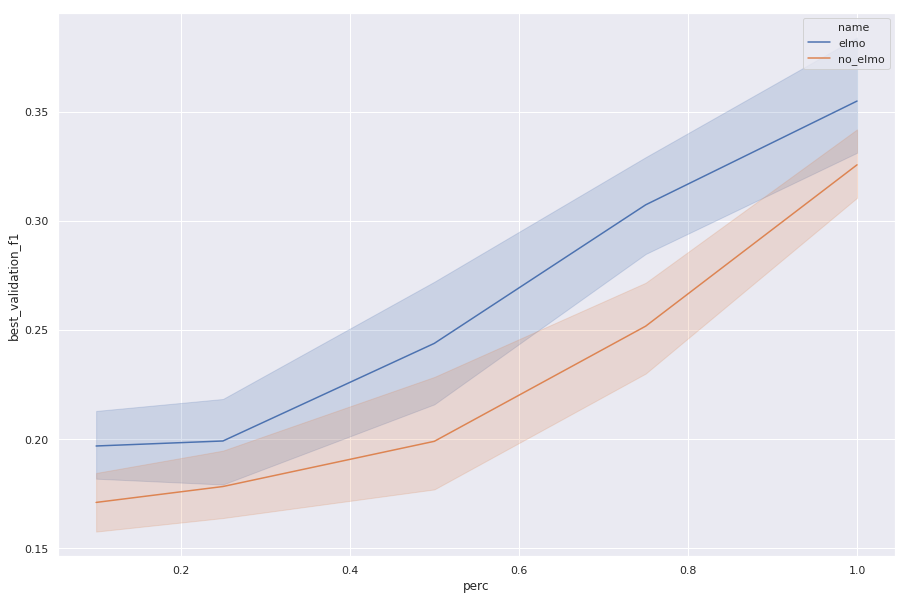

In [21]:
plot_perc(dfs, ["elmo", "no_elmo"], "best_validation_f1")

## ELMO vs no ELMO: holdout / respostas múltiplas

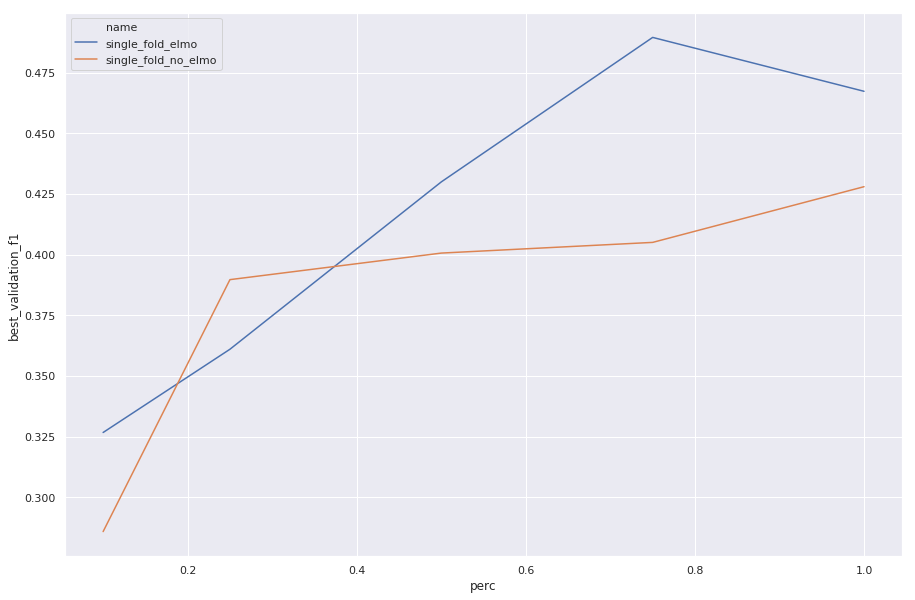

In [22]:
plot_perc(dfs, ["single_fold_elmo", "single_fold_no_elmo"], "best_validation_f1")

## Respostas múltiplas vs simples: ELMO / holdout

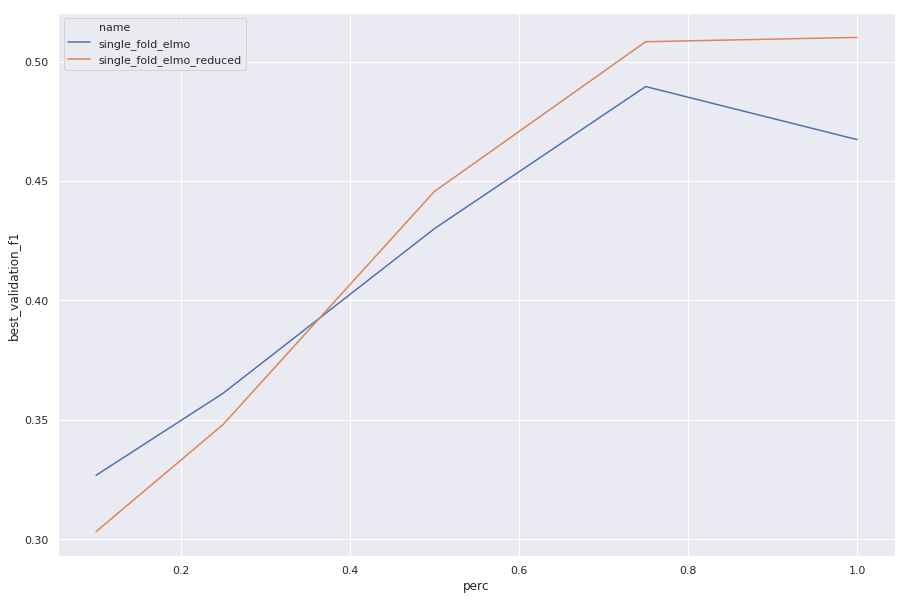

In [23]:
plot_perc(dfs, ["single_fold_elmo", "single_fold_elmo_reduced"], "best_validation_f1")

## Respostas múltiplas vs simples (100% train only): ELMO / k-fold

In [26]:
percs = dfs["elmo"].perc.unique()
df = dfs["kfold_reduced_elmo"]
dfs_new = []
for perc in percs:
    df_new = df.copy()
    df_new.perc = perc
    dfs_new.append(df_new)
df = pd.concat(dfs_new)

# display(df)

# df = df[["name", "perc", "best_validation_f1"]].groupby(["name", "perc"]).agg(["mean", "std"])
# display(df)

# df = dfs["elmo"][["name", "perc", "best_validation_f1"]].groupby(["name", "perc"]).agg(["mean", "std"])
# display(df)

dfs["kfold_reduced_elmo"] = df

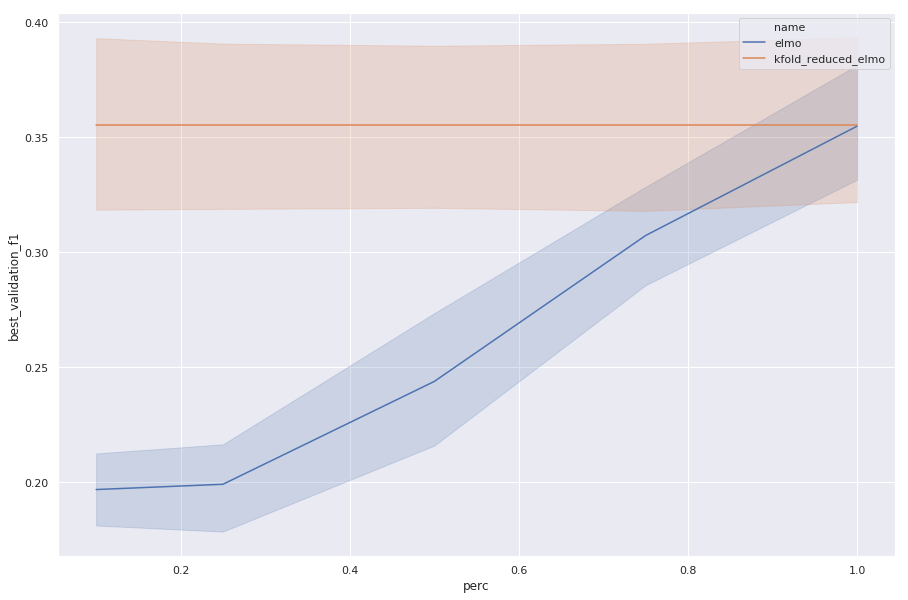

In [27]:
plot_perc(dfs, ["elmo", "kfold_reduced_elmo"], "best_validation_f1")